This Notebook was written by [Ezer Karash](https://www.linkedin.com/in/ezer-karash-205a5746). It's totaly open, just do me a favor and mention my name.

# Pandas

Pandas is a set of Data tools for Python, originaly wriitten by [Wes McKinney](http://wesmckinney.com/).

## Table of contents

* [Importing](#importing)
* [Creating a DataFrame](#creating_a_dataframe)
    * [Manually create a DF](#manually)
    * [Create a DF from csv](#from_csv)
    * [Create a DF from Json](#from_json)
* [DF building blocks (Series & Arrays)](#internals)
* [Accessing Data](#access)
* [Data Manipulation](#manipulation)
    * [Add Column](#add)
    * [Delete column](#del)
    * [Perfom calculation on columns](#cal)
* [Groupby](#group)
    * [By one column](#group1)
    * [By two columns](#group2)
    * [Apply custom function to groups (Split, Apply,Combine)](#apply)
    * [Filter groups](#filter) 
* [Descriptives](#desc)
* [Filter DF's](#filter_df)
* [Reset Index](#reset)
* [Merge DF's](#merge)
    * [Inner Join](#inner)
    * [Outer Join](#outer) 
    * [Left Join](#left)
* [Crosstabs](#cross)
* [Output](#out)
    * [Output DF to CSV](#to_csv)
    * [Output DF to Excel](#to_excel) 
* [Exercise](#exer)

<a id='importing'></a>

## Importing

In [1]:
import numpy as np
import pandas as pd

import os
os.chdir('data_files') #change working directory 

import matplotlib.pyplot as plt
#make graphs appear in the notebook:
%matplotlib inline 

<a id='creating_a_dataframe'></a>

## Creating a DataFrame

The basic object in PANDAS is the DataFrame which is a table with column headers and an index.

There are a couple ways to create a DF:

<a id='manually'></a>

### Manually create a DF

In [2]:
M = pd.DataFrame ([[1,2,3],[4,5,6],[7,8,9]])
M

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


<a id='from_csv'></a>

### Create a DF from csv

In [3]:
apt_prices = pd.read_csv('apt_prices.csv')
apt_prices

,Unnamed: 0,Total,Jerusalem,Tel-Aviv,Hifa,Center,North,South,J&S
0,2008,831.707980,1135.962985,1085.734157,583.158991,964.609008,455.024320,524.246473,707.119890
1,2009,942.503083,1248.372181,1278.239309,654.197155,1116.121897,485.377198,593.456024,865.652037
2,2010,1080.677258,1485.375241,1535.303936,745.366866,1291.132086,548.099930,697.311284,979.879819
3,2011,1147.036807,1585.286577,1625.708008,837.700898,1395.045286,635.376791,762.921564,1048.879058
4,2012,1180.057421,1566.048069,1626.727505,894.133017,1386.996519,702.497034,804.860056,1102.337978
5,2013,1277.390389,1639.106029,1778.222098,981.965391,1469.944090,761.947365,862.021347,1197.251308
6,2014 (1-10),1329.704990,1673.787880,1925.885396,1031.688764,1536.005094,803.264540,903.846856,1216.813244


In [4]:
apt_prices['Unnamed: 0'].unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014 (1-10)'], dtype=object)

<a id='from_json'></a>

### Create a DF from Json

Create a Json file from the DF previously created: 

In [5]:
pd.read_json('m.json')

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


view the Json (this is plain python):

In [6]:
with open('m.json') as f:
    print f.readlines()

['{"0":{"0":1,"1":4,"2":7},"1":{"0":2,"1":5,"2":8},"2":{"0":3,"1":6,"2":9}}']


create a DF from the Json file:

In [7]:
mm = pd.read_json('m.json')

In [8]:
mm

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


<a id='internals'></a>

## DF building blocks (Series & Arrays)

Each Column in the DataFrame is a Pandas Series Object, which could be created on its own:

In [9]:
S = pd.Series([1,2,3,'4','5','A','b','cat','dog',7.0,8.1])

In [10]:
S

0       1
1       2
2       3
3       4
4       5
5       A
6       b
7     cat
8     dog
9       7
10    8.1
dtype: object

And then a couple of Series could be binded into a DF:

In [11]:
S_doubled = pd.Series([x*2 for x in S])
S_df = pd.DataFrame([S,S_doubled],index=['Single','Double'])
S_df

,0,1,2,3,4,5,6,7,8,9,10
Single,1,2,3,4,5,A,b,cat,dog,7.0,8.1
Double,2,4,6,44,55,AA,bb,catcat,dogdog,14.0,16.2


Than the DF could be transposed, if needed:

In [12]:
S_df.T

,Single,Double
0,1,2
1,2,4
2,3,6
3,4,44
4,5,55
5,A,AA
6,b,bb
7,cat,catcat
8,dog,dogdog
9,7,14


Notice, that in the DF print out does not have a string/numeral distinction, BE CAREFULL!!!

A Series is an Indexed (labeled) Numpy one dimensional array:

In [13]:
S.index

RangeIndex(start=0, stop=11, step=1)

In [14]:
S.values

array([1, 2, 3, '4', '5', 'A', 'b', 'cat', 'dog', 7.0, 8.1], dtype=object)

In [15]:
type(S.index) , type(S.values)

(pandas.indexes.range.RangeIndex, numpy.ndarray)

hence a DF is an array of arrays with index:

In [16]:
S_df.index

Index([u'Single', u'Double'], dtype='object')

In [17]:
S_df.values

array([[1, 2, 3, '4', '5', 'A', 'b', 'cat', 'dog', 7.0, 8.1],
       [2, 4, 6, '44', '55', 'AA', 'bb', 'catcat', 'dogdog', 14.0, 16.2]], dtype=object)

In [18]:
type(S_df.index),type(S_df.values[0]),type(S_df.values[0][0])

(pandas.indexes.base.Index, numpy.ndarray, int)

Guess what happends if you Transpose:

In [19]:
S_df.T.index

RangeIndex(start=0, stop=11, step=1)

In [20]:
S_df.T.values

array([[1, 2],
       [2, 4],
       [3, 6],
       ['4', '44'],
       ['5', '55'],
       ['A', 'AA'],
       ['b', 'bb'],
       ['cat', 'catcat'],
       ['dog', 'dogdog'],
       [7.0, 14.0],
       [8.1, 16.2]], dtype=object)

<a id='access'></a>

## Accessing Data

You can access columns by name (remember a single column is a series):

In [21]:
apt_prices ['Jerusalem']

0    1135.962985
1    1248.372181
2    1485.375241
3    1585.286577
4    1566.048069
5    1639.106029
6    1673.787880
Name: Jerusalem, dtype: float64

or by access location:

In [22]:
tempTable =apt_prices.ix[:,2:5].sort_values('Tel-Aviv',ascending=False)#all rows, second column
tempTable.ix[:,-2:]

,Tel-Aviv,Hifa
6,1925.885396,1031.688764
5,1778.222098,981.965391
4,1626.727505,894.133017
3,1625.708008,837.700898
2,1535.303936,745.366866
1,1278.239309,654.197155
0,1085.734157,583.158991


you can access a single cell too:

In [23]:
apt_prices ['Jerusalem'][0]

1135.96298467885

and ranges as well:

In [24]:
apt_prices.ix[0:3,2]

0    1135.962985
1    1248.372181
2    1485.375241
3    1585.286577
Name: Jerusalem, dtype: float64

<a id='manipulation'></a>

## Data Manipulation

### Change columns name:

In [25]:
apt_prices.rename(columns = {'Unnamed: 0':'Year'},inplace=True)
apt_prices

,Year,Total,Jerusalem,Tel-Aviv,Hifa,Center,North,South,J&S
0,2008,831.707980,1135.962985,1085.734157,583.158991,964.609008,455.024320,524.246473,707.119890
1,2009,942.503083,1248.372181,1278.239309,654.197155,1116.121897,485.377198,593.456024,865.652037
2,2010,1080.677258,1485.375241,1535.303936,745.366866,1291.132086,548.099930,697.311284,979.879819
3,2011,1147.036807,1585.286577,1625.708008,837.700898,1395.045286,635.376791,762.921564,1048.879058
4,2012,1180.057421,1566.048069,1626.727505,894.133017,1386.996519,702.497034,804.860056,1102.337978
5,2013,1277.390389,1639.106029,1778.222098,981.965391,1469.944090,761.947365,862.021347,1197.251308
6,2014 (1-10),1329.704990,1673.787880,1925.885396,1031.688764,1536.005094,803.264540,903.846856,1216.813244


<a id='add'></a>

#### Add Column

In [26]:
apt_prices['Center-North'] = apt_prices.Center-apt_prices.North
print apt_prices.shape
apt_prices

(7, 10)


,Year,Total,Jerusalem,Tel-Aviv,Hifa,Center,North,South,J&S,Center-North
0,2008,831.707980,1135.962985,1085.734157,583.158991,964.609008,455.024320,524.246473,707.119890,509.584688
1,2009,942.503083,1248.372181,1278.239309,654.197155,1116.121897,485.377198,593.456024,865.652037,630.744699
2,2010,1080.677258,1485.375241,1535.303936,745.366866,1291.132086,548.099930,697.311284,979.879819,743.032156
3,2011,1147.036807,1585.286577,1625.708008,837.700898,1395.045286,635.376791,762.921564,1048.879058,759.668495
4,2012,1180.057421,1566.048069,1626.727505,894.133017,1386.996519,702.497034,804.860056,1102.337978,684.499485
5,2013,1277.390389,1639.106029,1778.222098,981.965391,1469.944090,761.947365,862.021347,1197.251308,707.996726
6,2014 (1-10),1329.704990,1673.787880,1925.885396,1031.688764,1536.005094,803.264540,903.846856,1216.813244,732.740554


<a id='del'></a>

#### Delete column

In [27]:
apt_prices.drop('Center-North',axis=1,inplace=True)
apt_prices.shape

(7, 9)

<a id='cal'></a>

#### Perfom calculation on columns

Multiply by 1000 and round:

In [28]:
apt_prices.ix[:,1:] = np.round(apt_prices.ix[:,1:]*1000,0)
apt_prices

,Year,Total,Jerusalem,Tel-Aviv,Hifa,Center,North,South,J&S
0,2008,831708.0,1135963.0,1085734.0,583159.0,964609.0,455024.0,524246.0,707120.0
1,2009,942503.0,1248372.0,1278239.0,654197.0,1116122.0,485377.0,593456.0,865652.0
2,2010,1080677.0,1485375.0,1535304.0,745367.0,1291132.0,548100.0,697311.0,979880.0
3,2011,1147037.0,1585287.0,1625708.0,837701.0,1395045.0,635377.0,762922.0,1048879.0
4,2012,1180057.0,1566048.0,1626728.0,894133.0,1386997.0,702497.0,804860.0,1102338.0
5,2013,1277390.0,1639106.0,1778222.0,981965.0,1469944.0,761947.0,862021.0,1197251.0
6,2014 (1-10),1329705.0,1673788.0,1925885.0,1031689.0,1536005.0,803265.0,903847.0,1216813.0


<a id='group'></a>

## Groupby

<a id='group1'></a>

### By One Column

Add a decade column:


In [98]:
decade = []
for year in apt_prices['Year']:
    if int(year[:4])<2011:
        decade.append(2000)
    else:
        decade.append(2010)
apt_prices['Decade'] = decade
apt_prices.ix[[0,3],:]

,Year,Total,Jerusalem,Tel-Aviv,Hifa,Center,North,South,J&S,Decade
0,2008,831708.0,1135963.0,1085734.0,583159.0,964609.0,455024.0,524246.0,707120.0,2000
3,2011,1147037.0,1585287.0,1625708.0,837701.0,1395045.0,635377.0,762922.0,1048879.0,2010


For performance reasons, it is good to store the grouping object as variable and not regroup the DF every time you need an aggragation calculation:

In [30]:
grouped_by_decades = apt_prices.groupby('Decade')

What was the highest price every decade?

In [31]:
apt_prices.groupby('Decade').max()

,Year,Total,Jerusalem,Tel-Aviv,Hifa,Center,North,South,J&S
Decade,,,,,,,,,
2000,2010,1080677.0,1485375.0,1535304.0,745367.0,1291132.0,548100.0,697311.0,979880.0
2010,2014 (1-10),1329705.0,1673788.0,1925885.0,1031689.0,1536005.0,803265.0,903847.0,1216813.0


What was the lowest price every decade?

In [32]:
apt_prices.groupby('Decade').min()

,Year,Total,Jerusalem,Tel-Aviv,Hifa,Center,North,South,J&S
Decade,,,,,,,,,
2000,2008,831708.0,1135963.0,1085734.0,583159.0,964609.0,455024.0,524246.0,707120.0
2010,2011,1147037.0,1566048.0,1625708.0,837701.0,1386997.0,635377.0,762922.0,1048879.0


<a id='group2'></a>

### By 2 columns

Load cities geo spatial Data

In [71]:
cities = pd.read_csv('cities_long.csv')
cities.head()

,Country,City,Region,Latitude,Longitude
0,ad,aixas,6.0,42.483333,1.466667
1,ad,aixirivali,6.0,42.466667,1.500000
2,ad,aixovall,6.0,42.466667,1.483333
3,ad,andorra,7.0,42.500000,1.516667
4,ad,ansalonga,4.0,42.566667,1.516667


Add location Categories

In [72]:
cities['West/East'] = ['West' if line<0 else 'East' for line in cities['Longitude']]
cities['South/North'] = ['South' if line<0 else 'North' for line in cities['Latitude']]
cities.head()

,Country,City,Region,Latitude,Longitude,West/East,South/North
0,ad,aixas,6.0,42.483333,1.466667,East,North
1,ad,aixirivali,6.0,42.466667,1.500000,East,North
2,ad,aixovall,6.0,42.466667,1.483333,East,North
3,ad,andorra,7.0,42.500000,1.516667,East,North
4,ad,ansalonga,4.0,42.566667,1.516667,East,North


group:

In [73]:
quarters = cities.groupby(['West/East','South/North'])

number of elements in each quarter:

In [74]:
quarters.count()

Country     City   Region  Latitude  Longitude
West/East South/North                                                
East      North        1455345  1455342  1455341   1455345    1455345
          South         272167   272167   272167    272167     272167
West      North         429897   429897   429896    429897     429897
          South          86058    86058    86058     86058      86058

Notice the Multindex, used as follows:

In [75]:
quarters.count().ix['East','North']

Country      1455345
City         1455342
Region       1455341
Latitude     1455345
Longitude    1455345
Name: (East, North), dtype: int64

<a id='apply'></a>

#### Apply custom function to groups (Split, Apply,Combine)

So far we've used ready made functions on the groups (max, min, mean, count etc.), what if we want a made up oporation ran over each group, for instance what is the gap between the max price and min price in evey region at every decade, we can define a function and apply it the grouped object:

In [38]:
def MinMax(df):
    df = df.drop(['Year','Decade'],axis=1)
    return df.max()-df.min()

In [39]:
grouped_by_decades.apply(MinMax)

,Total,Jerusalem,Tel-Aviv,Hifa,Center,North,South,J&S
Decade,,,,,,,,
2000,248969.0,349412.0,449570.0,162208.0,326523.0,93076.0,173065.0,272760.0
2010,182668.0,107740.0,300177.0,193988.0,149008.0,167888.0,140925.0,167934.0


Or in the nameless lambda version:

In [40]:
grouped_by_decades.apply(lambda x: x.drop(['Year','Decade'],axis=1).max()-x.drop(['Year','Decade'],axis=1).min())

,Total,Jerusalem,Tel-Aviv,Hifa,Center,North,South,J&S
Decade,,,,,,,,
2000,248969.0,349412.0,449570.0,162208.0,326523.0,93076.0,173065.0,272760.0
2010,182668.0,107740.0,300177.0,193988.0,149008.0,167888.0,140925.0,167934.0


<a id='filter'></a>

### Filter Groups

Keep only cities from world quarters with more than 1K cities:

In [41]:
df = quarters.filter(lambda x: len(x)>1000)
df[:7]

,Latitude,Longitude,City,West/East,South/North
1,51.062355,-1.314092,Winchester,West,North
3,50.903531,-1.404200,Southampton,West,North
4,53.797419,-1.543794,Leeds,West,North
5,53.382029,-1.465717,Sheffield,West,North
6,37.984149,23.727984,Αθήνα,East,North
7,33.849846,-116.537861,Palm Springs,West,North
8,34.050284,-118.242086,Los Angeles,West,North


<a id='desc'></a>

### Descriptives

In [42]:
apt_prices.shape

(7, 10)

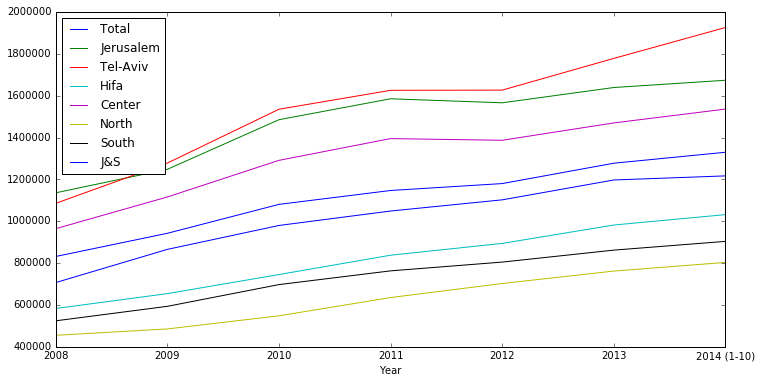

In [101]:
plot = apt_prices.drop('Decade',axis=1).set_index(apt_prices.Year).plot(figsize=[12,6])

In [77]:
apt_prices.describe()

,Total,Jerusalem,Tel-Aviv,Hifa,Center,North,South,J&S
count,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000,7.000000,7.000000e+00
mean,1.112725e+06,1.476277e+06,1.550831e+06,8.183159e+05,1.308551e+06,627369.571429,735523.285714,1.016848e+06
std,1.774255e+05,2.054682e+05,2.871126e+05,1.663272e+05,2.029148e+05,135957.767215,139148.720147,1.830410e+05
min,8.317080e+05,1.135963e+06,1.085734e+06,5.831590e+05,9.646090e+05,455024.000000,524246.000000,7.071200e+05
25%,1.011590e+06,1.366874e+06,1.406772e+06,6.997820e+05,1.203627e+06,516738.500000,645383.500000,9.227660e+05
50%,1.147037e+06,1.566048e+06,1.625708e+06,8.377010e+05,1.386997e+06,635377.000000,762922.000000,1.048879e+06
75%,1.228724e+06,1.612196e+06,1.702475e+06,9.380490e+05,1.432494e+06,732222.000000,833440.500000,1.149794e+06
max,1.329705e+06,1.673788e+06,1.925885e+06,1.031689e+06,1.536005e+06,803265.000000,903847.000000,1.216813e+06


Which area changed the most?

In [78]:
change=[]
for i in apt_prices.columns[2:]:
    change.append([round(apt_prices[i][(len(apt_prices)-1)]/apt_prices[i][0],2),i])
sorted(change,reverse=True)

[[1.77, 'Tel-Aviv'],
 [1.77, 'North'],
 [1.77, 'Hifa'],
 [1.72, 'South'],
 [1.72, 'J&S'],
 [1.59, 'Center'],
 [1.47, 'Jerusalem']]

In [79]:
cities.shape

(2243467, 7)

Five most popular city names:

In [80]:
cities.City.value_counts() [:5]

san jose       237
buena vista    227
san antonio    225
santa rosa     221
santa cruz     214
Name: City, dtype: int64

How many unique city names?

In [81]:
cities.City.nunique()

1659320

<a id='filter_df'></a>

## Filter DF's

Get only the cities in Japan:

In [82]:
cities[cities.Country=='jp'][:5]

,Country,City,Region,Latitude,Longitude,West/East,South/North
1052702,jp,a,47,26.606111,127.923889,East,North
1052703,jp,abamachi,27,32.750000,129.950000,East,North
1052704,jp,abashiri,12,44.019722,144.258611,East,North
1052705,jp,abatu,12,42.553889,140.757222,East,North
1052706,jp,abe,39,33.783333,134.633333,East,North


Get only the cities in Japan north to Longt 140:

In [83]:
cities[(cities.Country=='jp') & (cities.Longitude>140)][:5]

,Country,City,Region,Latitude,Longitude,West/East,South/North
1052704,jp,abashiri,12,44.019722,144.258611,East,North
1052705,jp,abatu,12,42.553889,140.757222,East,North
1052710,jp,abiko,4,35.866667,140.016667,East,North
1052711,jp,abira,12,42.816667,141.833333,East,North
1052715,jp,abukanai,12,44.200000,143.183333,East,North


Get only japanese Citys starting with 'b':

In [84]:
#create list of Japnese cities starting with 'b':
b_jp_cities = [x for x in cities[cities.Country=='jp'].City if x[0]=='b']
#filter the data according to list:
cities[cities.City.isin(b_jp_cities)][:7]

,Country,City,Region,Latitude,Longitude,West/East,South/North
2222,af,baba,30.0,36.742325,67.015434,East,North
2689,af,bai,33.0,35.699411,66.061637,East,North
2961,af,banda,8.0,33.703333,68.277222,East,North
2962,af,banda,18.0,34.251511,70.546211,East,North
2963,af,banda,35.0,34.860001,70.115273,East,North
2964,af,banda,41.0,33.896623,67.226301,East,North
3030,af,bando,35.0,34.731174,70.062294,East,North


<a id='reset'></a>

## Reset Index

Pandas always keeps the original indexes (in cases of filteartion for instance), if you want a new index, you have to reset it:

In [85]:
cities[cities.Region=='CA'][:5]

,Country,City,Region,Latitude,Longitude,West/East,South/North
2019976,us,abbott,CA,39.020556,-121.624444,West,North
2019977,us,aberdeen,CA,36.978056,-118.252500,West,North
2019978,us,abilene,CA,36.145556,-119.052778,West,North
2019979,us,abrams lake mobile estates,CA,41.338056,-122.354167,West,North
2019980,us,acampo,CA,38.174722,-121.277500,West,North


In [86]:
cities[cities.Region=='CA'].reset_index()[:5]

,index,Country,City,Region,Latitude,Longitude,West/East,South/North
0,2019976,us,abbott,CA,39.020556,-121.624444,West,North
1,2019977,us,aberdeen,CA,36.978056,-118.252500,West,North
2,2019978,us,abilene,CA,36.145556,-119.052778,West,North
3,2019979,us,abrams lake mobile estates,CA,41.338056,-122.354167,West,North
4,2019980,us,acampo,CA,38.174722,-121.277500,West,North


In [87]:
cities[cities.Region=='CA'].reset_index(drop=True)[:5]

,Country,City,Region,Latitude,Longitude,West/East,South/North
0,us,abbott,CA,39.020556,-121.624444,West,North
1,us,aberdeen,CA,36.978056,-118.252500,West,North
2,us,abilene,CA,36.145556,-119.052778,West,North
3,us,abrams lake mobile estates,CA,41.338056,-122.354167,West,North
4,us,acampo,CA,38.174722,-121.277500,West,North


<a id='merge'></a>

## Merge DF's

Merge is Pandas eqivalent of SQL's Join and hence could be done in inner, outer or partial mode.

<a id='inner'></a>

### Inner Join

Get apt_prices and city's geo location in case both data exists:

In [88]:
#transpose 
apt_T = apt_prices.T
#set years as headers
apt_T.columns = apt_prices.Year.values
#put cities in column and set a numerical index:
apt_T_indexed = apt_T.reset_index()
#name joining column (foereign key) with identical names
apt_T_indexed.rename(columns = {'index':'City'},inplace=True)
#lower cases
apt_T_indexed.City = [x.lower() for x in apt_T_indexed.City]

In [89]:
apt_T_indexed.merge(cities)[:10]

,City,2008,2009,2010,2011,2012,2013,2014 (1-10),Country,Region,Latitude,Longitude,West/East,South/North
0,total,831708,942503,1.08068e+06,1.14704e+06,1.18006e+06,1.27739e+06,1.32970e+06,id,17,-8.717600,116.162100,East,South
1,jerusalem,1.13596e+06,1.24837e+06,1.48538e+06,1.58529e+06,1.56605e+06,1.63911e+06,1.67379e+06,ao,2.0,-11.347826,16.298700,East,South
2,jerusalem,1.13596e+06,1.24837e+06,1.48538e+06,1.58529e+06,1.56605e+06,1.63911e+06,1.67379e+06,ao,6.0,-11.232802,15.408492,East,South
3,jerusalem,1.13596e+06,1.24837e+06,1.48538e+06,1.58529e+06,1.56605e+06,1.63911e+06,1.67379e+06,be,02,50.600000,4.366667,East,North
4,jerusalem,1.13596e+06,1.24837e+06,1.48538e+06,1.58529e+06,1.56605e+06,1.63911e+06,1.67379e+06,bo,3,-15.716667,-64.733333,West,South
5,jerusalem,1.13596e+06,1.24837e+06,1.48538e+06,1.58529e+06,1.56605e+06,1.63911e+06,1.67379e+06,br,22,-5.366667,-35.533333,West,South
6,jerusalem,1.13596e+06,1.24837e+06,1.48538e+06,1.58529e+06,1.56605e+06,1.63911e+06,1.67379e+06,br,24,-12.783333,-60.091667,West,South
7,jerusalem,1.13596e+06,1.24837e+06,1.48538e+06,1.58529e+06,1.56605e+06,1.63911e+06,1.67379e+06,br,30,-7.783333,-38.916667,West,South
8,jerusalem,1.13596e+06,1.24837e+06,1.48538e+06,1.58529e+06,1.56605e+06,1.63911e+06,1.67379e+06,co,38,10.450000,-74.466667,West,North
9,jerusalem,1.13596e+06,1.24837e+06,1.48538e+06,1.58529e+06,1.56605e+06,1.63911e+06,1.67379e+06,cz,88,49.662996,14.036530,East,North


Oops, there are Jerusalems all over the place, and there is a city named Total, try again with Israel only:

In [90]:
apt_T_indexed.merge(cities[cities.Country=='il'])[:10]

,City,2008,2009,2010,2011,2012,2013,2014 (1-10),Country,Region,Latitude,Longitude,West/East,South/North
0,jerusalem,1.13596e+06,1.24837e+06,1.48538e+06,1.58529e+06,1.56605e+06,1.63911e+06,1.67379e+06,il,6,31.78,35.23,East,North


<a id='outer'></a>

### Outer join

Get all cities from tables, give full data where possible:

In [91]:
apt_T_indexed.merge(cities[cities.Country=='il'],how='outer')[:15]

,City,2008,2009,2010,2011,2012,2013,2014 (1-10),Country,Region,Latitude,Longitude,West/East,South/North
0,year,2008,2009,2010,2011,2012,2013,2014 (1-10),NaN,NaN,NaN,NaN,NaN,NaN
1,total,831708,942503,1.08068e+06,1.14704e+06,1.18006e+06,1.27739e+06,1.32970e+06,NaN,NaN,NaN,NaN,NaN,NaN
2,jerusalem,1.13596e+06,1.24837e+06,1.48538e+06,1.58529e+06,1.56605e+06,1.63911e+06,1.67379e+06,il,6,31.780000,35.230000,East,North
3,tel-aviv,1.08573e+06,1.27824e+06,1.5353e+06,1.62571e+06,1.62673e+06,1.77822e+06,1.92588e+06,NaN,NaN,NaN,NaN,NaN,NaN
4,hifa,583159,654197,745367,837701,894133,981965,1.03169e+06,NaN,NaN,NaN,NaN,NaN,NaN
5,center,964609,1.11612e+06,1.29113e+06,1.39504e+06,1.387e+06,1.46994e+06,1.53600e+06,NaN,NaN,NaN,NaN,NaN,NaN
6,north,455024,485377,548100,635377,702497,761947,803265,NaN,NaN,NaN,NaN,NaN,NaN
7,south,524246,593456,697311,762922,804860,862021,903847,NaN,NaN,NaN,NaN,NaN,NaN
8,j&s,707120,865652,979880,1.04888e+06,1.10234e+06,1.19725e+06,1.21681e+06,NaN,NaN,NaN,NaN,NaN,NaN
9,aavroun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,il,3,33.047892,35.179946,East,North


<a id='left'></a>

### Left Join

Get all cities from the prices table, add geo table data whwere possible:

In [92]:
apt_T_indexed.merge(cities[cities.Country=='il'],how='left')[:15]

,City,2008,2009,2010,2011,2012,2013,2014 (1-10),Country,Region,Latitude,Longitude,West/East,South/North
0,year,2008,2009,2010,2011,2012,2013,2014 (1-10),NaN,NaN,NaN,NaN,NaN,NaN
1,total,831708,942503,1.08068e+06,1.14704e+06,1.18006e+06,1.27739e+06,1.32970e+06,NaN,NaN,NaN,NaN,NaN,NaN
2,jerusalem,1.13596e+06,1.24837e+06,1.48538e+06,1.58529e+06,1.56605e+06,1.63911e+06,1.67379e+06,il,6,31.78,35.23,East,North
3,tel-aviv,1.08573e+06,1.27824e+06,1.5353e+06,1.62571e+06,1.62673e+06,1.77822e+06,1.92588e+06,NaN,NaN,NaN,NaN,NaN,NaN
4,hifa,583159,654197,745367,837701,894133,981965,1.03169e+06,NaN,NaN,NaN,NaN,NaN,NaN
5,center,964609,1.11612e+06,1.29113e+06,1.39504e+06,1.387e+06,1.46994e+06,1.53600e+06,NaN,NaN,NaN,NaN,NaN,NaN
6,north,455024,485377,548100,635377,702497,761947,803265,NaN,NaN,NaN,NaN,NaN,NaN
7,south,524246,593456,697311,762922,804860,862021,903847,NaN,NaN,NaN,NaN,NaN,NaN
8,j&s,707120,865652,979880,1.04888e+06,1.10234e+06,1.19725e+06,1.21681e+06,NaN,NaN,NaN,NaN,NaN,NaN


<a id='cross'></a>

## CrossTabs

CrossTabulate 2 series:

In [93]:
us = cities[(cities.Country=='us')]
#find US 10 most popular city names
pop = us.City.value_counts()[:10].index

In [94]:
pop

Index([u'riverside', u'centerville', u'fairview', u'franklin', u'midway',
       u'greenwood', u'union', u'salem', u'marion', u'glendale'],
      dtype='object')

In [95]:
us =  us[us.City.isin(pop)]

In [96]:
pd.crosstab(us.Region,us.City)

City,centerville,fairview,franklin,glendale,greenwood,marion,midway,riverside,salem,union
Region,,,,,,,,,,
AL,1,1,1,1,1,1,1,1,1,1
AR,1,1,1,1,1,1,1,1,1,1
AZ,1,0,1,1,1,0,1,1,0,0
CA,1,1,1,1,1,0,1,1,0,1
CO,1,1,0,1,1,0,1,1,0,1
CT,1,0,1,0,0,1,1,1,1,1
DE,1,1,0,1,1,0,1,1,0,0
FL,1,1,1,1,1,1,1,1,1,1
GA,1,1,1,0,1,1,1,1,1,1


<a id='out'></a>

## Output

<a id='to_csv'></a>

### Output To CSV

In [97]:
apt_prices.to_csv('apt_prices_with decades.csv',index=False) #if the index is just runing numbers it is useless

<a id='to_excel'></a>

### Output to excel

This provides format features, and most useful the ability to output a multi sheet excel

In [102]:
xl_writer = pd.ExcelWriter('cities_by_country.xlsx') #create a writer yo can add to

In [103]:
cities[cities.Country=='il'].to_excel(xl_writer, sheet_name='Israel')
cities[cities.Country=='it'].to_excel(xl_writer, sheet_name='Italy')

In [104]:
xl_writer.save()

<a id='exer'></a>

## Exercise

Find the closest cities per region in Israel for regions with less than 100 cities (Hint - look up itertools.combinations).

### Solution

In [115]:
def Distance(city1,city2,df):
    lat1 = df[df.City==city1].reset_index().Latitude[0]
    lat2 = df[df.City==city2].reset_index().Latitude[0]
    long1 = df[df.City==city1].reset_index().Longitude[0]
    long2 = df[df.City==city2].reset_index().Longitude[0]
    return (lat2-lat1)**2+(long2-long1)**2

In [106]:
from itertools import combinations as comb

In [107]:
def Closest(df):
    a_smallest = 'na'
    b_smallest = 'na'
    smallest = []
    for a,b in comb(df.City,2):
        distance = Distance(a,b,df)
        if a_smallest=='na' and b_smallest=='na':
            a_smallest = a
            b_smallest = b
            distance_smallest = distance
        elif distance < distance_smallest:
            a_smallest = a
            b_smallest = b
            distance_smallest = distance
            smallest.append([a_smallest,b_smallest])
        elif distance==distance_smallest:
            smallest.append([a_smallest,b_smallest])
    df_new = pd.DataFrame(smallest)
    if df_new.shape[0]==0:
        df_new = pd.DataFrame([a_smallest,b_smallest])
    df_new.columns = ['City_a','City_b']
    dfr = df.reset_index() #needed for getting first element
    df_new['Country'] = dfr.Country[0]
    df_new['Region'] = dfr.Region[0]
    df_new['Distance'] = distance_smallest
    return df_new

In [108]:
#leave only Israel
data = cities[cities.Country=='il']
data.shape

(1235, 7)

In [109]:
#leave only regions with at least 200 cities:
data = data.groupby('Region').filter(lambda x: x.City.nunique()<=100)
data.shape

(141, 7)

In [110]:
#group:
grouped = data.groupby(['Country','Region'])

In [111]:
%%time
results = grouped.apply(Closest)

CPU times: user 27.3 s, sys: 4 ms, total: 27.3 s
Wall time: 27.3 s


In [112]:
results

City_a          City_b Country  Region  \
Country Region                                                           
il      5.0    0             abu kabir   ajami quarter      il     5.0   
               1             abu kabir         hatikva      il     5.0   
               2             abu kabir   kiryat shalom      il     5.0   
               3   ash sheikh muwannis      ramat aviv      il     5.0   
               4               bat yam          giaffa      il     5.0   
               5           benai beraq     pardes katz      il     5.0   
               6           el manshiya  jaffa-tel aviv      il     5.0   
        6.0    0            abu ghaush          `allar      il     6.0   
               1            abu ghaush        al malha      il     6.0   
               2            abu ghaush       `aminadav      il     6.0   
               3            abu ghaush           avtah      il     6.0   
               4            abu ghaush   bayt naqqubah      il     6.0   
               5            abu ghaush            dilb      il     6.0   
               6            abu ghaush  kiryat ye'arim      il     6.0   
               7             `aminadav      `ir gannim      il     6.0   
               8                 jorah     kefar salma      il     6.0   
               9            mekor haim         talpiot      il     6.0   
               10         ramat eshkol     sanhedriyya      il     6.0   

                   Distance  
Country Region               
il      5.0    0   0.000005  
               1   0.000005  
               2   0.000005  
               3   0.000005  
               4   0.000005  
               5   0.000005  
               6   0.000005  
        6.0    0   0.000011  
               1   0.000011  
               2   0.000011  
               3   0.000011  
               4   0.000011  
               5   0.000011  
               6   0.000011  
               7   0.000011  
               8   0.000011  
               9   0.000011  
               10  0.000011